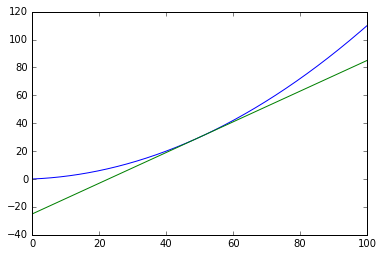

In [1]:
def f1(x):
    return 0.01 * x**2 + 0.1 * x

def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

def diff_tangent(f, x0):
    alpha = numerical_diff(f, x0)
    return lambda x: alpha * (x - x0) + f(x0)

%matplotlib inline
x = np.arange(0., 100., 0.1)
y = f1(x)
plt.plot(x, y)
plt.plot(x, diff_tangent(f1, 50)(x))

In [2]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        hs = np.zeros_like(x)
        hs[i] = h
        grad[i] = (f(x + hs) - f(x - hs)) / (2 * h)
    return grad

def f2(x):
    return sum(x**2)

numerical_gradient(f2, np.array([0., 2.]))

array([ 0.,  4.])

In [3]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

init_x = np.array([3., 4.])
gradient_descent(f2, init_x, 0.1, 100)


array([  6.11110793e-10,   8.14814391e-10])

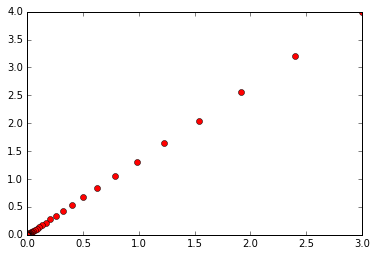

In [4]:
def plot_gradient_descent(f, init_x, lr=0.01, step_num=100, step_plot=10):
    x = init_x
    xs = [x.copy()]
    for _ in range(int(step_num/step_plot)):
        x = gradient_descent(f, x, lr=lr, step_num=step_plot)
        xs.append(x.copy())
    xs = np.array(xs)
    plt.plot(xs[:, 0], xs[:, 1], 'ro', ms=6)
    plt.show()

%matplotlib inline
init_x = np.array([3., 4.])
plot_gradient_descent(f2, init_x, 0.1, 100, 1)

In [6]:
# import importlib
# importlib.reload(gradient_simplenet)
import gradient_simplenet

net = gradient_simplenet.simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
label = np.array([0, 0, 1])
net.loss(x, label)

[[ 1.97221999  0.73619384 -0.83110382]
 [ 1.06424647  1.61836331  0.58070401]]
[ 2.14115382  1.89824328  0.02397132]
0


2.7615133036651933

In [7]:
from common import gradient
import importlib
importlib.reload(gradient)

def f(W):
    net.W = W
    return net.loss(x, label)

dW = gradient.numerical_gradient(f, net.W)
print(dW)

[[ 0.31500826  0.24707411 -0.56208236]
 [ 0.47251239  0.37061116 -0.84312354]]


In [8]:
import two_layers_net
importlib.reload(two_layers_net)
net = two_layers_net.TwoLayersNet(3, 5, 2)

x = np.array([1, 2, 3])
label = np.array([1, 1])
net.numerical_gradient(x, label)

{'W1': array([[ -6.72707892e-04,   2.83651096e-04,  -5.46743974e-04,
           7.31457156e-04,  -9.73607317e-05],
        [ -1.34541578e-03,   5.67302190e-04,  -1.09348795e-03,
           1.46291431e-03,  -1.94721461e-04],
        [ -2.01812366e-03,   8.50953282e-04,  -1.64023191e-03,
           2.19437145e-03,  -2.92082190e-04]]),
 'W2': array([[-0.24650251,  0.        ],
        [-0.24615653,  0.        ],
        [-0.25162461,  0.        ],
        [-0.24066801,  0.        ],
        [-0.24895422,  0.        ]]),
 'b1': array([ -6.72707892e-04,   2.83651096e-04,  -5.46743974e-04,
          7.31457156e-04,  -9.73607317e-05]),
 'b2': array([-0.49967333,  0.        ])}

In [9]:
import two_layers_net
import importlib
importlib.reload(two_layers_net)
net = two_layers_net.TwoLayersNet(784, 100, 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)

(784, 100)
(100,)


In [10]:
x = np.random.rand(100, 784)
y = np.random.rand(100, 10)
net.loss(x, y)
grads = net.numerical_gradient(x, y)

In [11]:
grads

{'W1': array([[  1.61353030e-04,   8.06578049e-05,   7.66996716e-05, ...,
           3.39926312e-04,   1.76847877e-04,  -9.09675013e-05],
        [  3.11791705e-04,   1.18649202e-04,   5.93084687e-05, ...,
           3.42296692e-04,   2.25128282e-04,  -8.39097070e-05],
        [  1.94964910e-04,   9.58455121e-05,   1.80385690e-05, ...,
           4.31242206e-04,   2.51199077e-04,   5.51659607e-05],
        ..., 
        [  1.77128567e-04,   1.33599436e-04,   2.53541454e-05, ...,
           3.22896332e-04,   2.10383660e-04,  -1.05275390e-04],
        [  2.15113202e-04,   1.08013682e-04,   4.83132362e-05, ...,
           3.25689918e-04,   2.05845482e-04,  -6.38782716e-05],
        [  2.21414075e-04,   1.06878925e-04,   7.79742698e-05, ...,
           4.13830966e-04,   2.51828662e-04,   1.99770456e-05]]),
 'W2': array([[-0.01770345, -0.03841436, -0.02079758, -0.01970419, -0.03304732,
         -0.01272065, -0.02591549, -0.03068463, -0.03392426, -0.02318573],
        [-0.01654726, -0.035325

In [ ]:
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layers_net import TwoLayersNet

(x_train, y_train), (x_test, y_test) =\
    load_mnist(normalize=True, one_hot_label=True)

iter_num = 1000
batch_size = 100
learning_rate = 0.1

net = TwoLayersNet(784, 10, 10)

losses_train = []
acc_trains, acc_tests = [], []
iter_per_epoch = int(x_train.shape[0]/batch_size)
n = 1
for i in range(iter_num):
#     print(i)
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch, y_batch = x_train[batch_mask], y_train[batch_mask]

    grads = net.numerical_gradient(x_batch, y_batch)
    for k in net.params.keys():
        net.params[k] -= learning_rate * grads[k]

    losses_train.append(net.loss(x_batch, y_batch))
    if i % iter_per_epoch == 0:
        acc_trains.append(net.accuracy(x_train, y_train))
        acc_tests.append(net.accuracy(x_test, y_test))
        print('%d epoch:: acc_train: %s,  acc_test: %s' % (n, acc_trains[-1], acc_tests[-1]))
        n += 1

1 epoch:: acc_train: 0.0986333333333,  acc_test: 0.0958


In [ ]:
%matplotlib inline
plt.plot(losses_train)
plt.show()

